In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params
from multi_group_simulation import MultiGroupSimulation

In [2]:
grp_params, grp_names, interactions_mtx = \
    load_multigroup_params("../src/simulations_v2/params/multigroup/noreopen.yaml")

In [7]:
multigrp_sim = MultiGroupSimulation(grp_params, interactions_mtx, grp_names)

In [22]:
interactions_mtx

array([[7.3, 1. ],
       [1. , 7.3]])

In [8]:
for _ in range(112):
    multigrp_sim.step()

In [9]:
df_grp0 = multigrp_sim.sims[0].sim_df

In [10]:
df_grp1 = multigrp_sim.sims[1].sim_df

In [19]:
multigrp_sim.sims[1].pop_size

15000

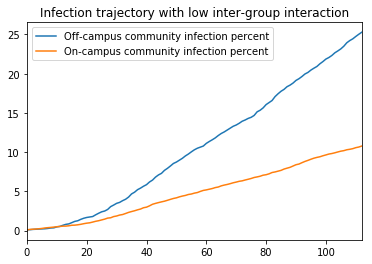

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
df_grp0 = multigrp_sim.sims[0].sim_df
df_grp1 = multigrp_sim.sims[1].sim_df
df_grp0[['S', 'QS']].apply(lambda x: (5000 - sum(x)) / 5000 * 100, axis=1) \
                    .plot(label="Off-campus community infection percent")
df_grp1[['S', 'QS']].apply(lambda x: (15000 - sum(x)) / 15000 * 100, axis=1) \
                    .plot(label="On-campus community infection percent")
plt.title("Infection trajectory with low inter-group interaction")
plt.legend(loc='best')

In [23]:
import copy
nointeractions_mtx = copy.copy(interactions_mtx)
nointeractions_mtx[1,0] = 0
nointeractions_mtx[0,1] = 0
multigrp_sim2 = MultiGroupSimulation(grp_params, nointeractions_mtx, grp_names)

In [24]:
for _ in range(112):
    multigrp_sim2.step()

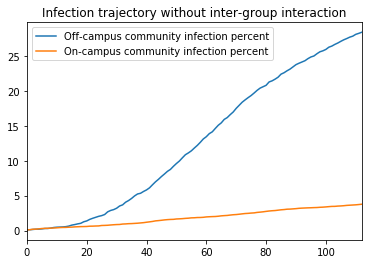

In [28]:
df_grp0 = multigrp_sim2.sims[0].sim_df
df_grp1 = multigrp_sim2.sims[1].sim_df
df_grp0[['S', 'QS']].apply(lambda x: (5000 - sum(x)) / 5000 * 100, axis=1) \
                    .plot(label="Off-campus community infection percent")
df_grp1[['S', 'QS']].apply(lambda x: (15000 - sum(x)) / 15000 * 100, axis=1) \
                    .plot(label="On-campus community infection percent")
plt.title("Infection trajectory without inter-group interaction")
plt.legend(loc='best')